In [107]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

NESSE PROJETO ANALISAMOS QUAL TABELA TEM MAIOR CORRELAÇÃO DE VENDAS COM AS VENDAS GLOBAIS, E REPONDEMOS AS SEGUINTES PERGUNTAS:

-QUAL FOI O GENERO DE JOGOS MAIS LANÇADOS ?
-QUAL ANO LANÇOU MAIS JOGOS ?
-DURANTE OS ANOS ENTRE 2007 A 2011 QUAL O RANK DE JOGOS LANÇADOS
-QUAL ANO VENDEU MAIS JOGOS

PROXIMAS PERGUNTAS A RESPONDER:

-QUAL PLATAFORMA VENDEU MAIS JOGOS NO MUNDO ?
    QUAL GENERO VENDEU MAIS NESSA PLATAFORMA ?

In [108]:
df = pd.read_csv(r'C:\Dev\material\vgsales.csv',index_col = 'Rank')



In [109]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [134]:
df.count()

Name            16250
Platform        16250
Year            15979
Genre           16250
Publisher       16194
NA_Sales        16250
EU_Sales        16250
JP_Sales        16250
Other_Sales     16250
Global_Sales    16250
dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [111]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [112]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [113]:
df['Genre'].describe()

count      16598
unique        12
top       Action
freq        3316
Name: Genre, dtype: object

In [114]:
#df.dropna(axis=1, inplace=True)  # Remove colunas com valores nulos
 

In [115]:
df.corr()

C:\Users\Sergio\AppData\Local\Temp\ipykernel_8948\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


<Axes: xlabel='Global_Sales', ylabel='NA_Sales'>

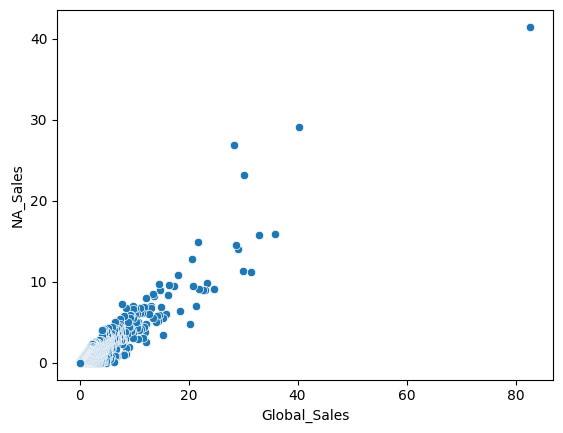

In [116]:
sns.scatterplot(data= df, x= 'Global_Sales', y= 'NA_Sales')

In [117]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [118]:
y = df['NA_Sales']
X = df['Global_Sales']

In [119]:
X = sm.add_constant(X)

In [120]:
modelo = sm.OLS(y,X)

In [121]:
resultado = modelo.fit()

In [122]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:               NA_Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.284e+05
Date:                Mon, 03 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:41:34   Log-Likelihood:                -2199.4
No. Observations:               16598   AIC:                             4403.
Df Residuals:                   16596   BIC:                             4418.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0010      0.002     -0.419   

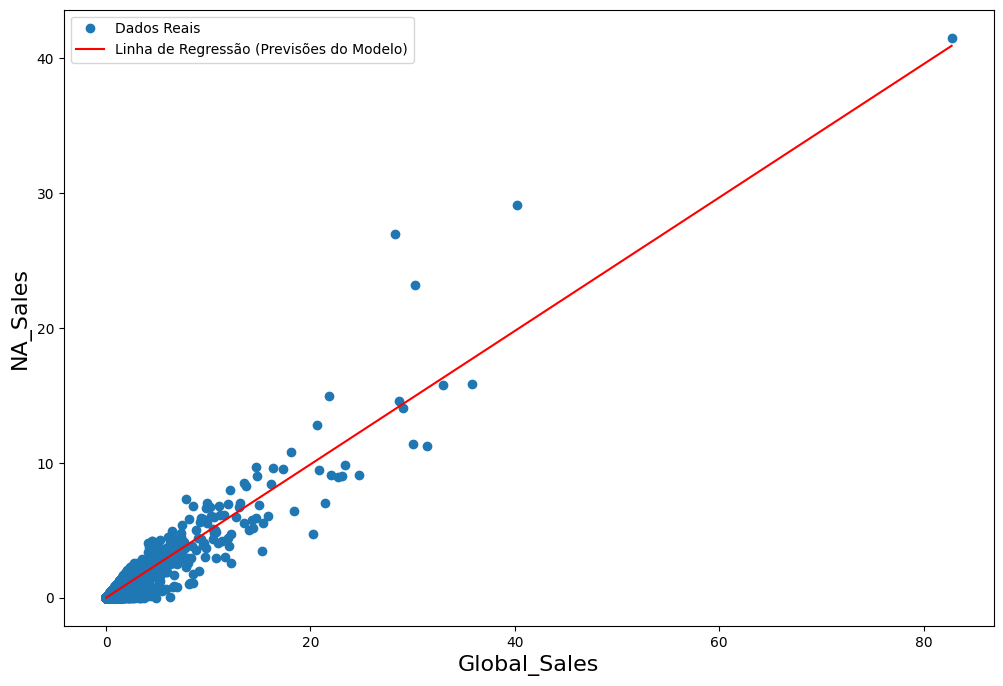

In [123]:
 # Plot
plt.figure(figsize = (12, 8))
plt.xlabel("Global_Sales", size = 16)
plt.ylabel("NA_Sales", size = 16)
plt.plot(X["Global_Sales"], y, "o", label = "Dados Reais")
plt.plot(X["Global_Sales"], resultado.fittedvalues, "r-", label = "Linha de Regressão (Previsões do Modelo)")
plt.legend(loc = "best")
plt.show()

In [124]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

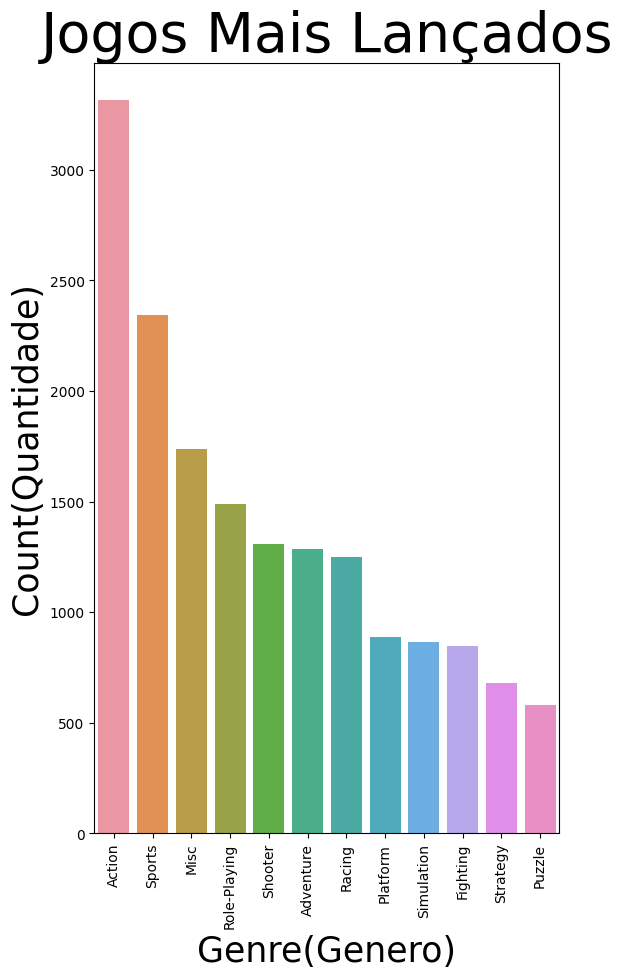

In [125]:
plt.figure(figsize = (6, 10))
sns.countplot(x = 'Genre', data = df, order = df['Genre'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Jogos Mais Lançados',fontsize=40)    #Note labelling the data
plt.ylabel('Count(Quantidade)',fontsize=25)                 #Note labelling the y-label
plt.xlabel('Genre(Genero)',fontsize=25)                 #Note labelling the x-label
plt.show()

In [126]:
df_row_index = df[df['Year'] > 2015].index      
df = df.drop(df_row_index)

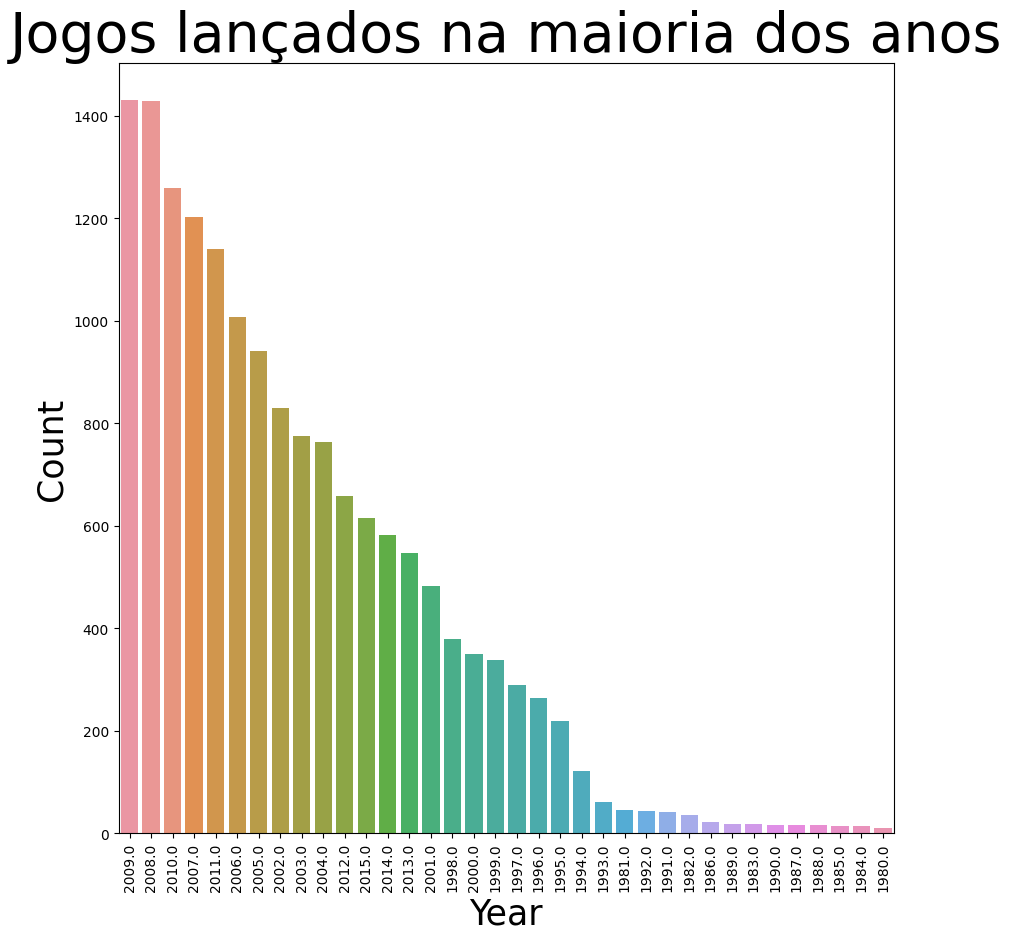

In [127]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'Year', data = df, order = df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation='vertical')
plt.title('Jogos lançados na maioria dos anos',fontsize=40)    #Note adding a title to the data
plt.ylabel('Count',fontsize = 25)                     #Note labelling the y-axis by count.
plt.xlabel('Year',fontsize = 25)                      #Note labelling the x-axis by year.
plt.show()

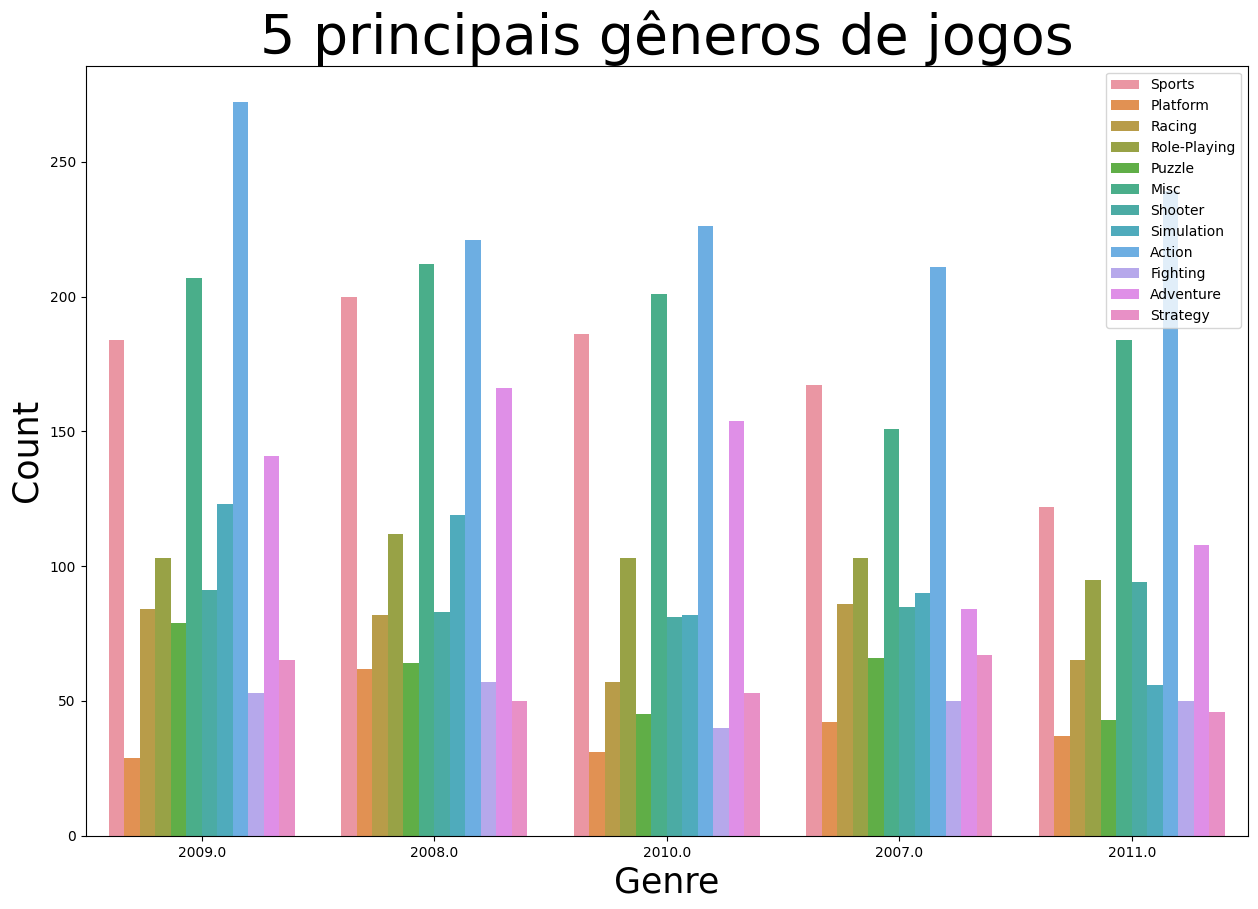

In [128]:
plt.figure(figsize = (15,10))
sns.countplot(x='Year', data=df, hue='Genre', order=df.Year.value_counts().index[:5])
plt.title('5 principais gêneros de jogos',fontsize = 40)   #Note labelling the data
plt.ylabel('Count',fontsize = 25)              #Note labelling the y-axis & aincreasing the size of the font.
plt.xlabel('Genre',fontsize = 25)              #Note labelling the x-axis & aincreasing the size of the font.
plt.legend()        
plt.show()


In [129]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [130]:
df_highest_sale_world = df.groupby('Year')['Global_Sales'].sum()
df_highest_sale_world = df_highest_sale_world.reset_index()  


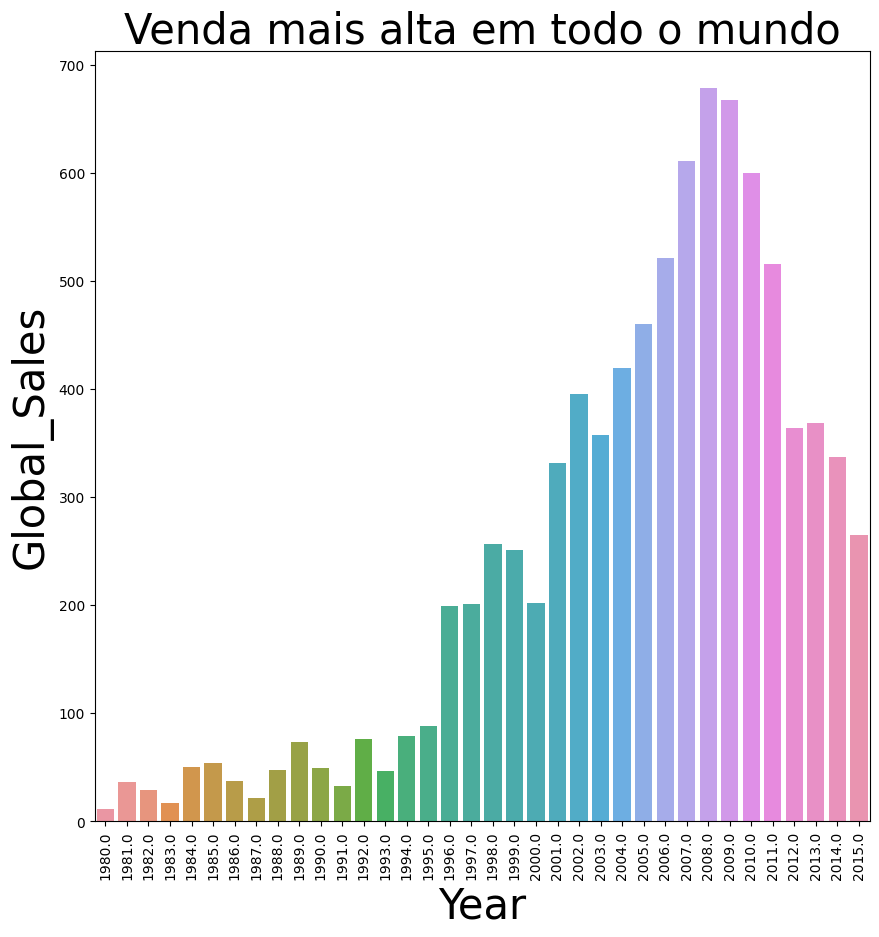

In [131]:
plt.figure(figsize= (10,10))
sns.barplot(x = 'Year', y = 'Global_Sales', data = df_highest_sale_world)
plt.xticks(rotation = 'vertical')
plt.title('Venda mais alta em todo o mundo', fontsize = 30)
plt.ylabel('Global_Sales',fontsize = 30)
plt.xlabel('Year',fontsize = 30)
plt.show()